In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
# geting the server info
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port
                                                   , postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [13]:
# Misiing Cleaning
# filling missing value with mean
our_list = df.columns
for column in our_list[3:]:
    df['column'] = df[column].fillna(df[column].interpolate())
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,column
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,265.519676


In [14]:
df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,column
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000,1491.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132,263.267799
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725,4.978792
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171,260.490023
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912,262.617766
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121,266.849675


# Remarkable Points

#### 1. Totol revene is less than total expenditure.
#### 2. The average of math scores is higher than reading.

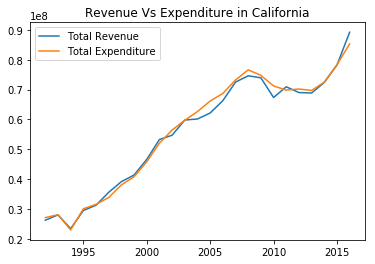

In [15]:
plt.plot(df.loc[df['STATE']=='CALIFORNIA']['YEAR'], df.loc[df['STATE']=='CALIFORNIA']['TOTAL_REVENUE'],
         label = 'Total Revenue')
plt.plot(df.loc[df['STATE']=='CALIFORNIA']['YEAR'], df.loc[df['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE'],
         label = 'Total Expenditure')
plt.title('Revenue Vs Expenditure in California')
plt.legend()
plt.show()

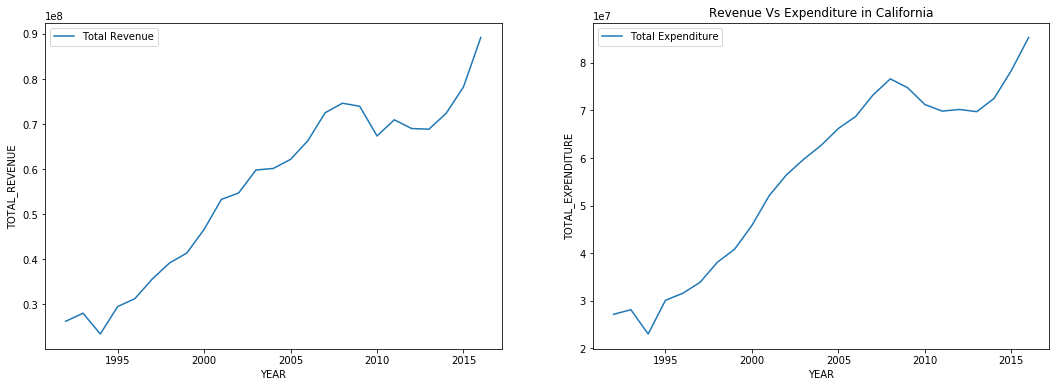

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
g = sns.lineplot(x=df.loc[df['STATE']=='CALIFORNIA']['YEAR'], y=df.loc[df['STATE']=='CALIFORNIA']['TOTAL_REVENUE'],
         label = 'Total Revenue')

plt.subplot(1,2,2)
g = sns.lineplot(x=df.loc[df['STATE']=='CALIFORNIA']['YEAR'], y=df.loc[df['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE'],
         label = 'Total Expenditure')
plt.title('Revenue Vs Expenditure in California')
plt.legend()
plt.show()

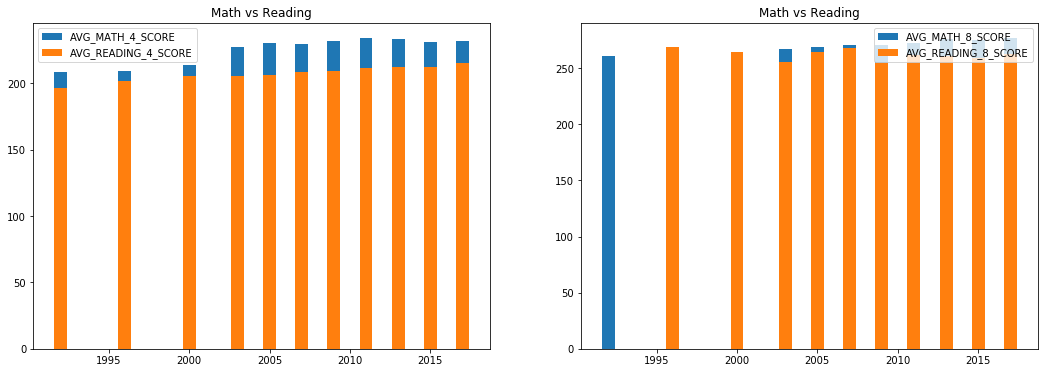

In [17]:
# Comparing math and reading score

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.bar(df.loc[df.STATE =='CALIFORNIA','YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_MATH_4_SCORE'],
         label = 'AVG_MATH_4_SCORE')         
plt.bar(df.loc[df.STATE =='CALIFORNIA','YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_READING_4_SCORE'],
         label = 'AVG_READING_4_SCORE') 
plt.title('Math vs Reading')
plt.legend()

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE =='CALIFORNIA','YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_MATH_8_SCORE'],
         label = 'AVG_MATH_8_SCORE')         
plt.bar(df.loc[df.STATE =='CALIFORNIA','YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_READING_8_SCORE'],
         label = 'AVG_READING_8_SCORE') 

plt.title('Math vs Reading')
plt.legend()
plt.show()

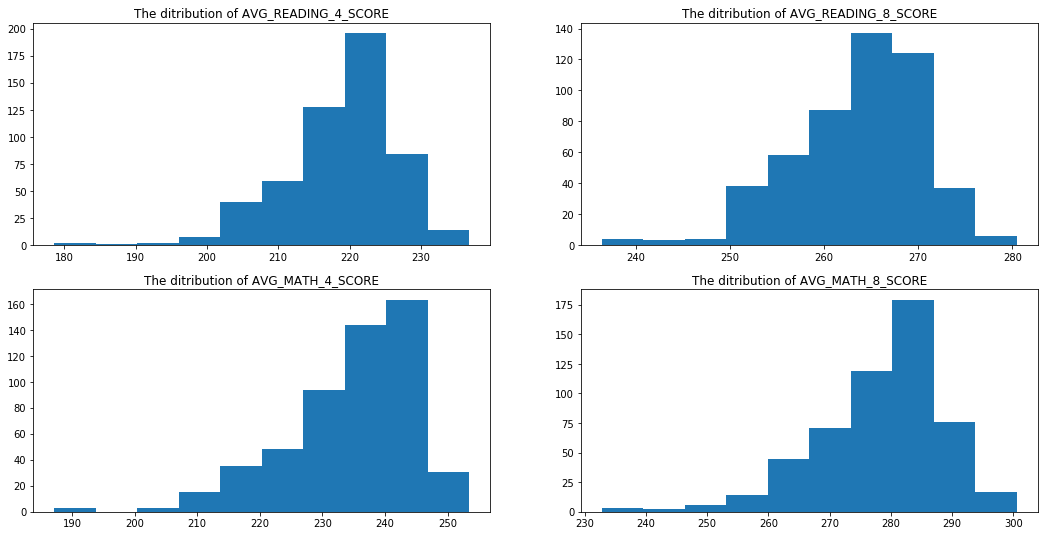

In [18]:
plt.figure(figsize=(18,9))

plt.subplot(2,2,1)
plt.hist(df['AVG_READING_4_SCORE'])
plt.title('The ditribution of AVG_READING_4_SCORE')

plt.subplot(2,2,2)
plt.hist(df['AVG_READING_8_SCORE'])
plt.title('The ditribution of AVG_READING_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df['AVG_MATH_4_SCORE'])
plt.title('The ditribution of AVG_MATH_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df['AVG_MATH_8_SCORE'])
plt.title('The ditribution of AVG_MATH_8_SCORE')

plt.show()

### The distributions are not normal, they are all skewed to the left

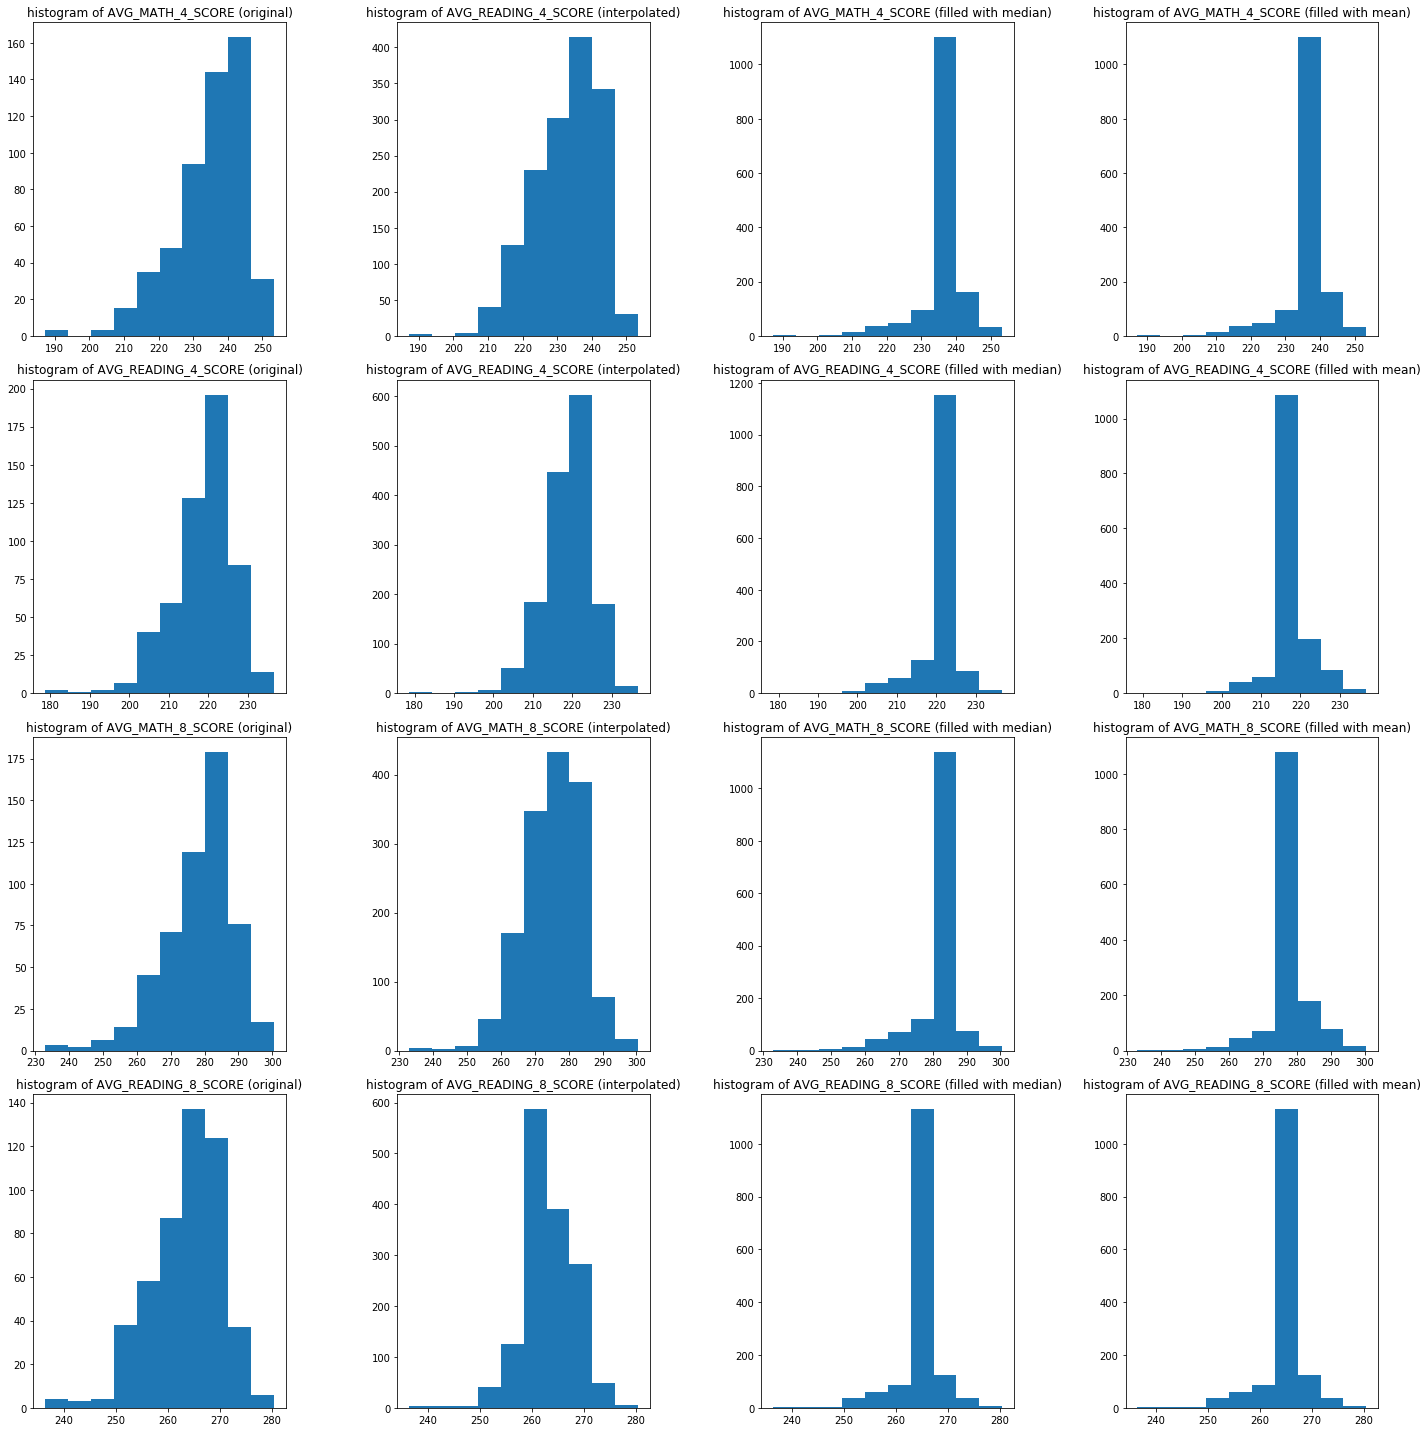

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()


#### In the above example, filling the missing values with mean and median will effect the distribution compltely since there are so many missing values.